In [1]:
import numpy as np
#import scipy.stats as ss
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import ascii
#from spectral_cube import SpectralCube
#import pyregion
#import astropy.units as u

%matplotlib inline 
matplotlib.rcParams['axes.linewidth'] = 2.5
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['font.size'] = 20

sectorad=np.pi/180./3600

mol=62503 # aGg' ethylene glycol
#mol=60003 # Methyl formate
#mol=60006 # Glycolaldehyde

In [2]:
def partf(t,mol):
    if mol==62503 :
        lqtab=np.array([5.8492,5.6614,5.3967,4.9445,4.4922,4.0395,3.5858])
        ttab=np.array([300,225,150,75,37.5,18.75,9.375])
    if mol==60006 :
        lqtab=np.log10(np.array([68416.9157,37614.8709,16321.0435,4632.3551,1587.6371,562.0801,199.5575]))
        ttab=np.array([300,225,150,75,37.5,18.75,9.375])
    if mol==60003 :
        lqtab=np.log10(np.array([199602.70,121102.02,59072.96,17548.82,5772.42,2030.84,720.82]))
        ttab=np.array([300,225,150,75,37.5,18.75,9.375])
    #
    ns=np.argsort(ttab)
    lqint=np.interp(t,ttab[ns],lqtab[ns])
    #
    return 10.**lqint

def fnlgl(smu2,nu,tdv):
    # See Fontani+2002
    # nu in GHz, tdv in K km/s, smu2 in D^2
    kb=1.3806488e-16
    const=3./8.*kb/np.pi/np.pi/np.pi*1.e-9*1.e5*1.e18*1.e18
    return const/nu/smu2*tdv

def fDnlgl(err,tdv,nlgl):
    return nlgl*err/tdv


In [9]:
if(mol==62503): 
    data_0 = ascii.read("g31_spw0_agg.txt") 
    nlgl_0=fnlgl(data_0['Smu2'],data_0['Frequenza'],data_0['Area']) 
    lnlgl_0=np.log(nlgl_0) 
    
    data_1 = ascii.read("g31_spw1_agg.txt") 
    nlgl_1=fnlgl(data_1['Smu2'],data_1['Frequenza'],data_1['Area']) 
    lnlgl_1=np.log(nlgl_1) 
    
    data_2 = ascii.read("g31_spw2_agg.txt") 
    nlgl_2=fnlgl(data_2['Smu2'],data_2['Frequenza'],data_2['Area']) 
    lnlgl_2=np.log(nlgl_2) 
    
    data_3 = ascii.read("g31_spw3_agg.txt") 
    nlgl_3=fnlgl(data_3['Smu2'],data_3['Frequenza'],data_3['Area']) 
    lnlgl_3=np.log(nlgl_3) 
    
    ymin=22
    ymax=34
    xmin=0 
    xmax=500
   
m,b = np.polyfit(np.concatenate((data_0['Eu'],data_1['Eu'],data_2['Eu'],data_3['Eu'])),np.concatenate((lnlgl_0,lnlgl_1,lnlgl_2,lnlgl_3)), 1)
myt=-1./m

q=partf(myt,mol)
myn=np.e**b*q
print "T=",myt,"N=",myn


T= 141.073975606 N= 1.09997983159e+17


In [10]:
Dnlgl_0=fDnlgl(data_0['Err'], data_0['Area'], nlgl_0)

Dp_0=np.log(nlgl_0+Dnlgl_0)-lnlgl_0
Dn_0=lnlgl_0-np.log(nlgl_0-Dnlgl_0)

Dnlgl_1=fDnlgl(data_1['Err'], data_1['Area'], nlgl_1)

Dp_1=np.log(nlgl_1+Dnlgl_1)-lnlgl_1
Dn_1=lnlgl_1-np.log(nlgl_1-Dnlgl_1)

Dnlgl_2=fDnlgl(data_2['Err'], data_2['Area'], nlgl_2)

Dp_2=np.log(nlgl_2+Dnlgl_2)-lnlgl_2
Dn_2=lnlgl_2-np.log(nlgl_2-Dnlgl_2)

Dnlgl_3=fDnlgl(data_3['Err'], data_3['Area'], nlgl_3)

Dp_3=np.log(nlgl_3+Dnlgl_3)-lnlgl_3
Dn_3=lnlgl_3-np.log(nlgl_3-Dnlgl_3)

x=np.copy(np.concatenate((data_0['Eu'],data_1['Eu'],data_2['Eu'],data_3['Eu'])))
x.sort()

(22, 34)

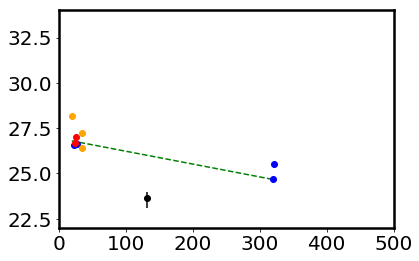

In [11]:
#plt.ion()
#plt.plot(data['Eu'],lnlgl,'.',color='red')
plt.errorbar(data_0['Eu'],lnlgl_0, yerr=[Dn_0,Dp_0], fmt= 'o', color='blue') 

plt.errorbar(data_1['Eu'],lnlgl_1, yerr=[Dn_1,Dp_1], fmt= 'o', color='red')

plt.errorbar(data_2['Eu'],lnlgl_2, yerr=[Dn_2,Dp_2], fmt= 'o', color='orange')

plt.errorbar(data_3['Eu'],lnlgl_3, yerr=[Dn_3,Dp_3], fmt= 'o', color='black')

plt.plot(x,m*x+b,linestyle='dashed',color='green')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
#plt.draw()